In [4]:
# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

import warnings
warnings.filterwarnings("ignore")

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

import utils_plotting_psd, utils_plotting, utils_psd, utils_io, utils_statistics
pd.options.display.float_format = "{:,.3f}".format

from lib_data import DATA_IO

In [2]:
PATH_CURR = os.path.abspath(os.curdir)    # current code
PATH      = (str(Path(PATH_CURR).parent)) # data repository: upper directory where datasets situated

In [3]:
# load PSD dataframe
LFP_PSD_controlateral = utils_io.load_LFP_event_PSD(event_category="tapping", event_laterality="controlateral")
LFP_PSD_ipsilateral   = utils_io.load_LFP_event_PSD(event_category="tapping", event_laterality="ipsilateral")

# 1. Plotting

## 1.1 Controlateral

In [ ]:
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_controlateral, vmin=-50, vmax=100, segment="pre_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/controlateral/motor_LID_arm_severity_for_pre_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_controlateral, vmin=-50, vmax=100, segment="event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/controlateral/motor_LID_arm_severity_for_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_controlateral, vmin=-50, vmax=100, segment="post_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/controlateral/motor_LID_arm_severity_for_post_event_segment")

## 1.2 Ipsilateral

In [ ]:
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_ipsilateral, vmin=-50, vmax=100, segment="pre_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/ipsilateral/motor_LID_arm_severity_for_pre_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_ipsilateral, vmin=-50, vmax=100, segment="event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/ipsilateral/motor_LID_arm_severity_for_event_segment")
utils_plotting_psd.plot_LID_severity_psd(LFP_PSD_ipsilateral, vmin=-50, vmax=100, segment="post_event", dyskinesia_strategy="dyskinesia_arm", error_type="se", 
                                         figure_name=DATA_IO.path_figure + "LFP-PSD/tapping/ipsilateral/motor_LID_arm_severity_for_post_event_segment")

# 2. Statistical Analyses (Python)

## 2.2 Between Dyskinesia Severity Groups For Event Segments

In [4]:
LFP_PSD = pd.DataFrame()

for severity in LFP_PSD_controlateral.keys():
    LFP_PSD = pd.concat([LFP_PSD, LFP_PSD_controlateral[severity]], ignore_index=True)

LFP_PSD['grouping_1'] = LFP_PSD['dyskinesia_arm'].map({'none':'A_noLID', 'mild':'B_LID', 'moderate':'B_LID'})
LFP_PSD['grouping_2'] = LFP_PSD['dyskinesia_arm']
LFP_PSD.loc[(LFP_PSD['event_start_time'] < 30)  & (LFP_PSD['grouping_2'] == "none"), 'grouping_2'] = 'noLID_noDOPA'
LFP_PSD.loc[(LFP_PSD['event_start_time'] >= 30) & (LFP_PSD['grouping_2'] == "none"), 'grouping_2'] = 'noLID_DOPA'
LFP_PSD['grouping_3_1'] = LFP_PSD['grouping_2'].map({'noLID_noDOPA':'A_noLID_noDOPA', 'noLID_DOPA':'B_noLID_DOPA', 'mild':'C_mild', 'moderate':'D_moderate'})
LFP_PSD['grouping_3_2'] = LFP_PSD['grouping_2'].map({'noLID_noDOPA':'D_noLID_noDOPA', 'noLID_DOPA':'A_noLID_DOPA', 'mild':'B_mild', 'moderate':'C_moderate'})
LFP_PSD['grouping_3_3'] = LFP_PSD['grouping_2'].map({'noLID_noDOPA':'C_noLID_noDOPA', 'noLID_DOPA':'D_noLID_DOPA', 'mild':'A_mild', 'moderate':'B_moderate'})
LFP_PSD['grouping_2_1'] = LFP_PSD['grouping_2'].map({'noLID_noDOPA':'A_noLID_noDOPA', 'noLID_DOPA':'B_noLID_DOPA', 'mild':'C_LID', 'moderate':'C_LID'})
LFP_PSD['grouping_2_2'] = LFP_PSD['grouping_2_1'].map({'A_noLID_noDOPA':'C_noLID_noDOPA', 'B_noLID_DOPA':'A_noLID_DOPA', 'C_LID':'B_LID'})

features_pre_event  = ['pre_event_theta_mean', 'pre_event_alpha_mean', 'pre_event_beta_low_mean', 'pre_event_beta_high_mean', 'pre_event_gamma_mean']
features_event      = ['event_theta_mean', 'event_alpha_mean', 'event_beta_low_mean', 'event_beta_high_mean', 'event_gamma_mean']
features_post_event = ['post_event_theta_mean', 'post_event_alpha_mean', 'post_event_beta_low_mean', 'post_event_beta_high_mean', 'post_event_gamma_mean']

### 2.2.1 Pre-Event Segment

In [ ]:
LMM_results = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independent_variable="grouping_1", 
                                             random_effect="patient", random_intercept=True, random_slope=False, constant_variance=False)
LMM_results[['feature', 'group_1', 'group_2', 'coefficient', 'p_value']]

In [ ]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independent_variable="grouping_2_1", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=False)
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independent_variable="grouping_2_2", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=False)

LMM_results_2 = LMM_results_2[(LMM_results_2.group_1=="A_noLID_DOPA") & (LMM_results_2.group_2=="B_LID")]

LMM_results                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)

LMM_results["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results.p_value.to_list(), correction_method="holm")
LMM_results[['feature', 'group_1', 'group_2', 'coefficient', 'p_value_corrected']]

In [27]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independent_variable="grouping_3_1", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independent_variable="grouping_3_2", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
LMM_results_3 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_pre_event, independent_variable="grouping_3_3", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
 
LMM_results_2         = LMM_results_2[(LMM_results_2.group_1=="A_noLID_DOPA") & ((LMM_results_2.group_2=="B_mild") | (LMM_results_2.group_2=="C_moderate"))]
LMM_results_3         = LMM_results_3[(LMM_results_3.group_1=="A_mild") & (LMM_results_3.group_2=="B_moderate")]
LMM_results_pre_event = pd.concat([LMM_results_1, LMM_results_2, LMM_results_3], ignore_index=True)

LMM_results_pre_event["group_1"] = LMM_results_pre_event["group_1"] .map({'A_noLID_noDOPA':'noLID_noDOPA', 'A_noLID_DOPA':'noLID_DOPA', 'A_mild':'mild'})
LMM_results_pre_event["group_2"] = LMM_results_pre_event["group_2"] .map({'B_noLID_DOPA':'noLID_DOPA', 'C_mild':'mild', 'D_moderate':'moderate',
                                                                          'B_mild':'mild', 'C_moderate':'moderate', 'B_moderate':'moderate'})

LMM_results_pre_event['p_value_corrected'] = LMM_results_pre_event.groupby('feature')['p_value'].transform(lambda x: utils_statistics.apply_multiple_correction(x, 'fdr_bh')) # correction within frequency band
#LMM_results_pre_event["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results_pre_event.p_value, correction_method='bonferroni')

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3_1
--> groups               : A_noLID_noDOPA, B_noLID_DOPA, C_mild, D_moderate
--> random effect        : patient
--> random intercept     : True
--> random slope         : False
------------------------------------------------------------------
--> response variable    : pre_event_theta_mean
--> response variable    : pre_event_alpha_mean
--> response variable    : pre_event_beta_low_mean
--> response variable    : pre_event_beta_high_mean
--> response variable    : pre_event_gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3_2
--> groups               : 

### 2.2.2 Event Segment

In [29]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_event, independent_variable="grouping_3_1", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_event, independent_variable="grouping_3_2", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
LMM_results_3 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_event, independent_variable="grouping_3_3", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
 
LMM_results_2     = LMM_results_2[(LMM_results_2.group_1=="A_noLID_DOPA") & ((LMM_results_2.group_2=="B_mild") | (LMM_results_2.group_2=="C_moderate"))]
LMM_results_3     = LMM_results_3[(LMM_results_3.group_1=="A_mild") & (LMM_results_3.group_2=="B_moderate")]
LMM_results_event = pd.concat([LMM_results_1, LMM_results_2, LMM_results_3], ignore_index=True)

LMM_results_event["group_1"] = LMM_results_event["group_1"] .map({'A_noLID_noDOPA':'noLID_noDOPA', 'A_noLID_DOPA':'noLID_DOPA', 'A_mild':'mild'})
LMM_results_event["group_2"] = LMM_results_event["group_2"] .map({'B_noLID_DOPA':'noLID_DOPA', 'C_mild':'mild', 'D_moderate':'moderate',
                                                                          'B_mild':'mild', 'C_moderate':'moderate', 'B_moderate':'moderate'})

LMM_results_event['p_value_corrected'] = LMM_results_event.groupby('feature')['p_value'].transform(lambda x: utils_statistics.apply_multiple_correction(x, 'fdr_bh')) # correction within frequency band
#LMM_results_event["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results_event.p_value, correction_method='bonferroni')

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3_1
--> groups               : A_noLID_noDOPA, B_noLID_DOPA, C_mild, D_moderate
--> random effect        : patient
--> random intercept     : True
--> random slope         : False
------------------------------------------------------------------
--> response variable    : event_theta_mean
--> response variable    : event_alpha_mean
--> response variable    : event_beta_low_mean
--> response variable    : event_beta_high_mean
--> response variable    : event_gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3_2
--> groups               : A_noLID_DOPA, B_mild

### 2.2.3 Post-Event Segment

In [31]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_post_event, independent_variable="grouping_3_1", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_post_event, independent_variable="grouping_3_2", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
LMM_results_3 = utils_statistics.run_LMM_model(dataset=LFP_PSD, response_variables=features_post_event, independent_variable="grouping_3_3", 
                                               random_effect="patient", random_intercept=True, random_slope=False, constant_variance=True)
 
LMM_results_2         = LMM_results_2[(LMM_results_2.group_1=="A_noLID_DOPA") & ((LMM_results_2.group_2=="B_mild") | (LMM_results_2.group_2=="C_moderate"))]
LMM_results_3         = LMM_results_3[(LMM_results_3.group_1=="A_mild") & (LMM_results_3.group_2=="B_moderate")]
LMM_results_post_event = pd.concat([LMM_results_1, LMM_results_2, LMM_results_3], ignore_index=True)

LMM_results_post_event["group_1"] = LMM_results_post_event["group_1"] .map({'A_noLID_noDOPA':'noLID_noDOPA', 'A_noLID_DOPA':'noLID_DOPA', 'A_mild':'mild'})
LMM_results_post_event["group_2"] = LMM_results_post_event["group_2"] .map({'B_noLID_DOPA':'noLID_DOPA', 'C_mild':'mild', 'D_moderate':'moderate',
                                                                          'B_mild':'mild', 'C_moderate':'moderate', 'B_moderate':'moderate'})

LMM_results_post_event['p_value_corrected'] = LMM_results_post_event.groupby('feature')['p_value'].transform(lambda x: utils_statistics.apply_multiple_correction(x, 'fdr_bh')) # correction within frequency band
#LMM_results_post_event["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results_post_event.p_value, correction_method='bonferroni')

Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3_1
--> groups               : A_noLID_noDOPA, B_noLID_DOPA, C_mild, D_moderate
--> random effect        : patient
--> random intercept     : True
--> random slope         : False
------------------------------------------------------------------
--> response variable    : post_event_theta_mean
--> response variable    : post_event_alpha_mean
--> response variable    : post_event_beta_low_mean
--> response variable    : post_event_beta_high_mean
--> response variable    : post_event_gamma_mean
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------
Linear Mixed Effect Model Started
------------------------------------------------------------------
--> independent variable : grouping_3_2
--> groups            

### Plotting

<Figure size 640x480 with 0 Axes>

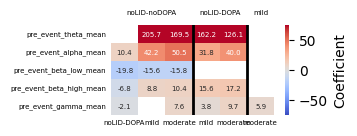

<Figure size 640x480 with 0 Axes>

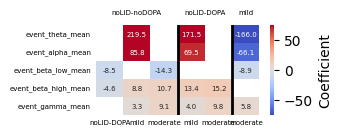

<Figure size 640x480 with 0 Axes>

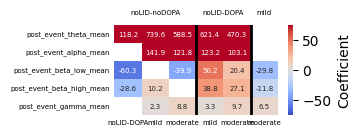

In [33]:
plt = utils_plotting.get_figure_template()
ax  = plt.subplot2grid((77, 66), (0, 0) , colspan=24, rowspan=11)
ax  = utils_plotting.plot_coefficient_heatmap(LMM_results_pre_event, features_pre_event, alpha=0.05, ax=ax)
plt.savefig(DATA_IO.path_figure + "statistics/motor_STN_pre_event_segment.svg", dpi=300)

plt = utils_plotting.get_figure_template()
ax  = plt.subplot2grid((77, 66), (0, 0) , colspan=24, rowspan=11)
ax  = utils_plotting.plot_coefficient_heatmap(LMM_results_event, features_event, alpha=0.05, ax=ax)
plt.savefig(DATA_IO.path_figure + "statistics/motor_STN_event_segment.svg", dpi=300)

plt = utils_plotting.get_figure_template()
ax  = plt.subplot2grid((77, 66), (0, 0) , colspan=24, rowspan=11)
ax  = utils_plotting.plot_coefficient_heatmap(LMM_results_post_event, features_post_event, alpha=0.05, ax=ax)
plt.savefig(DATA_IO.path_figure + "statistics/motor_STN_post_event_segment.svg", dpi=300)

In [46]:
LFP_PSD["severity"] = LFP_PSD.grouping_2

In [58]:
LFP_PSD[['patient','severity','pre_event_theta_mean','pre_event_alpha_mean','pre_event_beta_low_mean','pre_event_beta_high_mean','pre_event_gamma_mean',
         'event_theta_mean','event_alpha_mean','event_beta_low_mean','event_beta_high_mean','event_gamma_mean',
         'post_event_theta_mean','post_event_alpha_mean','post_event_beta_low_mean','post_event_beta_high_mean','post_event_gamma_mean']].to_csv("LFP_PSD.csv", index=False)

## 2.3 Within Dyskinesia Severity Groups

In [ ]:
# make a compact version

theta = LFP_PSD.pre_event_theta_mean.to_list()
theta.extend(LFP_PSD.event_theta_mean.to_list())
theta.extend(LFP_PSD.post_event_theta_mean.to_list())

alpha = LFP_PSD.pre_event_alpha_mean.to_list()
alpha.extend(LFP_PSD.event_alpha_mean.to_list())
alpha.extend(LFP_PSD.post_event_alpha_mean.to_list())

beta_low = LFP_PSD.pre_event_beta_low_mean.to_list()
beta_low.extend(LFP_PSD.event_beta_low_mean.to_list())
beta_low.extend(LFP_PSD.post_event_beta_low_mean.to_list())

beta_high = LFP_PSD.pre_event_beta_high_mean.to_list()
beta_high.extend(LFP_PSD.event_beta_high_mean.to_list())
beta_high.extend(LFP_PSD.post_event_beta_high_mean.to_list())

gamma  = LFP_PSD.pre_event_gamma_mean.to_list()
gamma.extend(LFP_PSD.event_gamma_mean.to_list())
gamma.extend(LFP_PSD.event_gamma_mean.to_list())

segment = ["pre_event"] * len(LFP_PSD)
segment.extend(["event"] * len(LFP_PSD))
segment.extend(["post_event"] * len(LFP_PSD))

LFP_PSD_compact                   = pd.DataFrame()
LFP_PSD_compact['patient']        = LFP_PSD['patient'].to_list() * 3
LFP_PSD_compact['event_no']       = LFP_PSD['event_no'].to_list() * 3
LFP_PSD_compact['grouping_1']     = LFP_PSD['grouping_1'].to_list() * 3
LFP_PSD_compact['grouping_2']     = LFP_PSD['grouping_2'].to_list() * 3
LFP_PSD_compact['grouping_3']     = LFP_PSD['grouping_3_1'].to_list() * 3
LFP_PSD_compact['segment']        = segment
LFP_PSD_compact['theta_mean']     = theta
LFP_PSD_compact['alpha_mean']     = alpha

LFP_PSD_compact['beta_low_mean']  = beta_low
LFP_PSD_compact['beta_high_mean'] = beta_high
LFP_PSD_compact['gamma_mean']     = gamma

LFP_PSD_compact['segment_1']      = LFP_PSD_compact['segment'].map({'pre_event':'A_pre_event', 'event':'B_event', 'post_event':'C_post_event'})
LFP_PSD_compact['segment_2']      = LFP_PSD_compact['segment'].map({'pre_event':'C_pre_event', 'event':'A_event', 'post_event':'B_post_event'})

### 2.3.1 NoLID NoDOPA

In [ ]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_3=="A_noLID_noDOPA"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True)

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[(LFP_PSD_compact.grouping_3=="A_noLID_noDOPA")], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_2", random_effect="patient", 
                                               random_intercept=True, random_slope=True)

LMM_results_2                                 = LMM_results_2[(LMM_results_2.group_1 == "A_event") & (LMM_results_2.group_2 == "B_post_event")]
LMM_results_noLID_noDOPA                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results_noLID_noDOPA["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results_noLID_noDOPA.p_value, correction_method='holm')
LMM_results_noLID_noDOPA

### 2.3.2 NoLID DOPA

In [ ]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_3=="B_noLID_DOPA"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True)

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_3=="B_noLID_DOPA"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_2", random_effect="patient", 
                                               random_intercept=True, random_slope=True)

LMM_results_2                               = LMM_results_2[(LMM_results_2.group_1 == "A_event") & (LMM_results_2.group_2 == "B_post_event")]
LMM_results_noLID_DOPA                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results_noLID_DOPA["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results_noLID_DOPA.p_value, correction_method='holm')

LMM_results_noLID_DOPA

### 2.3.3 Mild

In [ ]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_3=="C_mild"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=True)

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_3=="C_mild"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_2", random_effect="patient", 
                                               random_intercept=True, random_slope=True)

LMM_results_2                         = LMM_results_2[(LMM_results_2.group_1 == "A_event") & (LMM_results_2.group_2 == "B_post_event")]
LMM_results_mild                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results_mild["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results_mild.p_value, correction_method='bonferroni')

LMM_results_mild

### 2.3.3 Moderate

In [ ]:
LMM_results_1 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_3=="D_moderate"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_1", random_effect="patient", 
                                               random_intercept=True, random_slope=False)

print("------------------------------------------------------------------")
print("")
print("------------------------------------------------------------------")
LMM_results_2 = utils_statistics.run_LMM_model(dataset=LFP_PSD_compact[LFP_PSD_compact.grouping_3=="D_moderate"], 
                                               response_variables=["theta_mean","alpha_mean", "beta_low_mean", "beta_high_mean", "gamma_mean"], 
                                               independent_variable="segment_2", random_effect="patient", 
                                               random_intercept=True, random_slope=False)

LMM_results_2                             = LMM_results_2[(LMM_results_2.group_1 == "A_event") & (LMM_results_2.group_2 == "B_post_event")]
LMM_results_moderate                      = pd.concat([LMM_results_1, LMM_results_2], ignore_index=True)
LMM_results_moderate["p_value_corrected"] = utils_statistics.apply_multiple_correction(LMM_results_moderate.p_value, correction_method='bonferroni')

LMM_results_moderate

## 2.4 Consider Dyskinesia Severity + Event Segment Interaction (Similar to Two-Way Anova)

In [ ]:
results_1 = utils_statistics.run_LMM_model_with_interaction(dataset=LFP_PSD_compact, 
                                                            response_variables=['theta_mean', 'alpha_mean', 'beta_low_mean', 'beta_high_mean','gamma_mean'], 
                                                            independed_variable="grouping_2", block_variable="segment_1", random_effect="patient", 
                                                            random_intercept=True, random_slope=True)
results_2 = utils_statistics.run_LMM_model_with_interaction(dataset=LFP_PSD_compact, 
                                                            response_variables=['theta_mean', 'alpha_mean', 'beta_low_mean', 'beta_high_mean','gamma_mean'], 
                                                            independed_variable="grouping_3", block_variable="segment_1", random_effect="patient", 
                                                            random_intercept=True, random_slope=True)

results_2 = results_2[(results_2.reference_severity=="A_mild") & (results_2.comparison_severity=="B_moderate")]
results                      = pd.concat([results_1, results_2], ignore_index=True)
results["p_value_corrected"] = utils_statistics.apply_multiple_correction(results.p_value, correction_method='fdr_bh')

In [ ]:
results[['feature', 'reference_severity', 'reference_segment',
       'comparison_severity', 'comparison_segment', 'coefficient','p_value_corrected']]

# 3. Statistical Analyses (Matlab Results)

<Figure size 640x480 with 0 Axes>

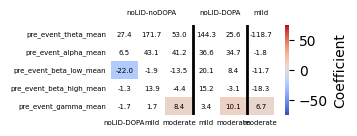

<Figure size 640x480 with 0 Axes>

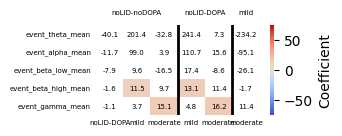

<Figure size 640x480 with 0 Axes>

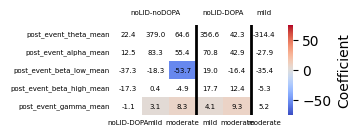

In [9]:
LMM_result = pd.read_csv(DATA_IO.path_events + "lmm/lmm_comparison_LFP.csv")

LMM_result = LMM_result[~(((LMM_result.reference_group=="mild") & ((LMM_result.comparison_group=="noLID_noDOPA") | (LMM_result.comparison_group=="noLID_DOPA"))) |
                         ((LMM_result.reference_group=="noLID_DOPA") & (LMM_result.comparison_group=="noLID_noDOPA")))]

features_pre_event     = ['pre_event_theta_mean', 'pre_event_alpha_mean', 'pre_event_beta_low_mean', 'pre_event_beta_high_mean', 'pre_event_gamma_mean']
features_event         = ['event_theta_mean', 'event_alpha_mean', 'event_beta_low_mean', 'event_beta_high_mean', 'event_gamma_mean']
features_post_event    = ['post_event_theta_mean', 'post_event_alpha_mean', 'post_event_beta_low_mean', 'post_event_beta_high_mean', 'post_event_gamma_mean']

LMM_results_pre_event  = LMM_result[LMM_result.feature.isin(features_pre_event)]
LMM_results_event      = LMM_result[LMM_result.feature.isin(features_event)]
LMM_results_post_event = LMM_result[LMM_result.feature.isin(features_post_event)]

LMM_results_pre_event["p_value_corrected"]  = LMM_results_pre_event.groupby('feature')['p_value'].transform(lambda x: utils_statistics.apply_multiple_correction(x, 'fdr_bh'))
LMM_results_event["p_value_corrected"]      = LMM_results_event.groupby('feature')['p_value'].transform(lambda x: utils_statistics.apply_multiple_correction(x, 'fdr_bh'))
LMM_results_post_event["p_value_corrected"] = LMM_results_post_event.groupby('feature')['p_value'].transform(lambda x: utils_statistics.apply_multiple_correction(x, 'fdr_bh'))

LMM_results_pre_event["group_1"]  = LMM_results_pre_event.reference_group
LMM_results_pre_event["group_2"]  = LMM_results_pre_event.comparison_group

LMM_results_event["group_1"]      = LMM_results_event.reference_group
LMM_results_event["group_2"]      = LMM_results_event.comparison_group

LMM_results_post_event["group_1"] = LMM_results_post_event.reference_group
LMM_results_post_event["group_2"] = LMM_results_post_event.comparison_group


plt = utils_plotting.get_figure_template()
ax  = plt.subplot2grid((77, 66), (0, 0) , colspan=24, rowspan=11)
ax  = utils_plotting.plot_coefficient_heatmap(LMM_results_pre_event, features_pre_event, alpha=0.05, ax=ax)
plt.savefig(DATA_IO.path_figure + "statistics/motor_STN_pre_event_segment.svg", dpi=300)

plt = utils_plotting.get_figure_template()
ax  = plt.subplot2grid((77, 66), (0, 0) , colspan=24, rowspan=11)
ax  = utils_plotting.plot_coefficient_heatmap(LMM_results_event, features_event, alpha=0.05, ax=ax)
plt.savefig(DATA_IO.path_figure + "statistics/motor_STN_event_segment.svg", dpi=300)

plt = utils_plotting.get_figure_template()
ax  = plt.subplot2grid((77, 66), (0, 0) , colspan=24, rowspan=11)
ax  = utils_plotting.plot_coefficient_heatmap(LMM_results_post_event, features_post_event, alpha=0.05, ax=ax)
plt.savefig(DATA_IO.path_figure + "statistics/motor_STN_post_event_segment.svg", dpi=300)

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="theta_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="alpha_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_low_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_high_mean", hue="grouping_1", errorbar=('sd', 1),dodge=0.2,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['severe']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="gamma_mean", hue="grouping_2", errorbar=('sd', 1),dodge=0.3,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_high_mean", hue="grouping_2", errorbar=('sd', 1), dodge=0.3,
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="beta_low_mean", hue="grouping_2", 
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="alpha_mean", hue="grouping_2", 
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

In [ ]:
sns.pointplot(data=LFP_PSD_compact, x="segment", y="theta_mean", hue="grouping_2", 
              palette = [utils_plotting.colors["no_LID"],utils_plotting.colors['tapping']['mild'],utils_plotting.colors['tapping']['moderate']])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the fixed effects coefficients and confidence intervals
coef_names = ["Intercept", "grouping_2[T.B_mild]", "grouping_2[T.C_moderate]"]
coef_values = [-5.747, 22.131, 0.836]
conf_intervals = [[-10.292, -1.202], [-14.048, 58.310], [-19.408, 21.079]]

# Prepare data for plotting
errors = [(coef_values[i] - conf_intervals[i][0], conf_intervals[i][1] - coef_values[i]) for i in range(len(coef_values))]

# Plot fixed effects with confidence intervals
plt.figure(figsize=(8, 6))
plt.errorbar(coef_values, coef_names, xerr=np.array(errors).T, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axvline(x=0, color='red', linestyle='--')  # Line at zero for reference
plt.xlabel("Coefficient Estimate")
plt.title("Fixed Effects Coefficients with 95% Confidence Intervals")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

# Example random effects data for plotting
random_effects_data = {
    'Group': ['Group1', 'Group2', 'Group3', 'Group4', 'Group5'],
    'Random_Effect': [10, -5, 15, -3, 7]
}

# Convert to DataFrame
random_effects_df = pd.DataFrame(random_effects_data)

# Plot random effects
plt.figure(figsize=(8, 6))
sns.barplot(x="Random_Effect", y="Group", data=random_effects_df, color='skyblue')
plt.axvline(x=0, color='red', linestyle='--')  # Line at zero for reference
plt.xlabel("Random Effect Estimate")
plt.title("Random Effects by Group")
plt.show()

In [ ]:
# Coefficient results data
coef_data = pd.DataFrame({
    'Coef': ['Intercept', 'grouping_1[T.B_LID]'],
    'Estimate': [215.733, 132.842],
    'Std. Error': [156.891, 118.719],
    'CI Lower': [-91.768, -99.844],
    'CI Upper': [523.234, 365.528]
})

# Plotting
plt.figure(figsize=(8, 5))
sns.pointplot(data=coef_data, x='Coef', y='Estimate',join=False,capsize=0.2,color='blue')
plt.errorbar(coef_data['Coef'], coef_data['Estimate'], yerr=[coef_data['Estimate'] - coef_data['CI Lower'], coef_data['CI Upper'] - coef_data['Estimate']], fmt='o', color='blue', capsize=4)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel("Coefficient Estimate")
plt.title("Fixed Effects Coefficients with 95% Confidence Intervals")
plt.show()